<a href="https://colab.research.google.com/github/USMS-FPK-IA-GI-2025/controle01-numpy-matplotlib-iris/blob/main/notebooks/controle_numpy_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contrôle 01 — Data Science avec NumPy et Matplotlib
**Master 1 — Intelligence Artificielle & Génie Informatique (FPK / USMS)**

Nom & Prénom :  Alouani Hatim
Filière :  SIIA
Année universitaire : 2025

---

**Règles :**
- Bibliothèques autorisées : NumPy, Matplotlib
- Toute autre bibliothèque est interdite
- Chaque question doit être traitée dans une cellule dédiée
- Chaque résultat doit être brièvement interprété


In [42]:
!pip install numpy matplotlib

# Partie A — Importation du Dataset, Arrays, Premières Manipulations

### A1. Importation du dataset
Importez NumPy et Matplotlib.  
Chargez le fichier `iris.csv` avec `np.genfromtxt` (`delimiter=','`, `skip_header=1`).  
Stockez les données dans un array nommé `data` et affichez sa `shape`.


In [40]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt("../data/Iris.csv", delimiter=",", skip_header=1, dtype=str)
print(data.shape)


(150, 6)


### A2. Séparation des features et des espèces
Séparez :
- les 4 premières colonnes numériques dans un array `features`
- la dernière colonne (espèces) dans un array `species`
Utilisez le slicing.


In [10]:
features = data[:, :4].astype(float)
species = data[:, 4]

### A3. Indexing
Affichez les 5 premières lignes de `features` en utilisant l’indexing.


In [12]:
features[:5]


array([[1. , 5.1, 3.5, 1.4],
       [2. , 4.9, 3. , 1.4],
       [3. , 4.7, 3.2, 1.3],
       [4. , 4.6, 3.1, 1.5],
       [5. , 5. , 3.6, 1.4]])

### A4. Extraction d’une colonne
Créez un array `sepal_length` contenant uniquement la première colonne de `features`.  
Affichez sa `size` et son `dtype`.


In [13]:
sepal_length = features[:, 0]
print(sepal_length.size)
print(sepal_length.dtype)


150
float64


### A5. Slicing par espèce
Utilisez le slicing pour extraire les 50 premières lignes correspondant à l’espèce *Setosa*.  
Stockez-les dans `setosa_features`.


In [14]:
setosa_features = features[:50]


# Partie B — Statistiques Basiques et Opérations Mathématiques

### B6. Moyenne par colonne
Calculez la moyenne de chaque colonne de `features` avec `np.mean(axis=0)`.


In [15]:
mean_features = np.mean(features, axis=0)
mean_features

array([75.5       ,  5.84333333,  3.054     ,  3.75866667])

### B7. Min et Max
Trouvez la valeur minimale et maximale de la longueur des pétales.


In [16]:
petal_length = features[:, 2]
petal_length.min(), petal_length.max()


(np.float64(2.0), np.float64(4.4))

### B9. Normalisation
Normalisez les longueurs des pétales en les divisant par leur maximum.
Stockez le résultat dans `normalized_petals`.


In [17]:
normalized_petals = petal_length / petal_length.max()

### B10. Somme cumulée
Calculez la somme cumulée des largeurs des pétales pour Versicolor.
Affichez les 10 premières valeurs.


In [18]:
versicolor_petal_width = features[50:100, 3]
cumsum_versicolor = np.cumsum(versicolor_petal_width)
cumsum_versicolor[:10]


array([ 4.7,  9.2, 14.1, 18.1, 22.7, 27.2, 31.9, 35.2, 39.8, 43.7])

### B10. Somme cumulée
Calculez la somme cumulée des largeurs des pétales pour Versicolor.
Affichez les 10 premières valeurs.


In [43]:
versicolor_petal_width = features[50:100, 3]
cumsum_versicolor = np.cumsum(versicolor_petal_width)
cumsum_versicolor[:10]


array([ 4.7,  9.2, 14.1, 18.1, 22.7, 27.2, 31.9, 35.2, 39.8, 43.7])

# Partie C — Transformations Avancées avec NumPy

### C11. Espèces uniques
Listez les espèces uniques avec `np.unique` et comptez leurs occurrences.


In [19]:
unique_species, counts = np.unique(species, return_counts=True)
unique_species, counts



(array(['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '1.0', '1.1', '1.2',
        '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2.0', '2.1',
        '2.2', '2.3', '2.4', '2.5'], dtype='<U15'),
 array([ 6, 28,  7,  7,  1,  1,  7,  3,  5, 13,  8, 12,  4,  2, 12,  5,  6,
         6,  3,  8,  3,  3]))

### C12. Reshape par espèce
Transformez `features` en un array de forme `(3, 50, 4)` nommé `features_by_species`.


In [20]:
features_by_species = features.reshape(3, 50, 4)



### C13. Concaténation
Concaténez horizontalement les moyennes par colonne avec un array de zéros.


In [21]:
zeros = np.zeros(4)
concat = np.hstack((mean_features, zeros))
concat



array([75.5       ,  5.84333333,  3.054     ,  3.75866667,  0.        ,
        0.        ,  0.        ,  0.        ])

### C14. Data cleaning (simulation)
Simulez des valeurs NaN et remplacez-les avec `np.nan_to_num`.


In [22]:
features_nan = features.copy()
features_nan[0, 0] = np.nan
features_clean = np.nan_to_num(features_nan)



### C15. Broadcasting
Ajoutez 1 à toutes les valeurs de la première colonne de `features`.


In [23]:
features[:, 0] += 1



### C16. np.where
Créez un array binaire indiquant si la longueur des pétales est supérieure à 4.0.


In [24]:
binary_petals = np.where(petal_length > 4.0, 1, 0)


# Partie D — Visualisation avec Matplotlib (Plots Simples)

### D17. Line plot
Line plot des longueurs des sépales pour les 50 premières fleurs.


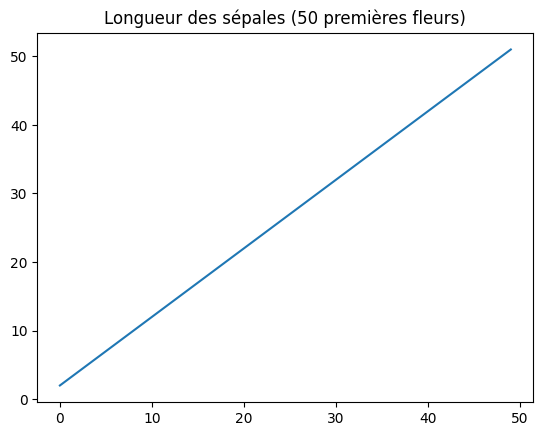

In [25]:
plt.plot(sepal_length[:50])
plt.title("Longueur des sépales (50 premières fleurs)")
plt.show()



### D18. Scatter plot
Scatter plot : longueur vs largeur des pétales.


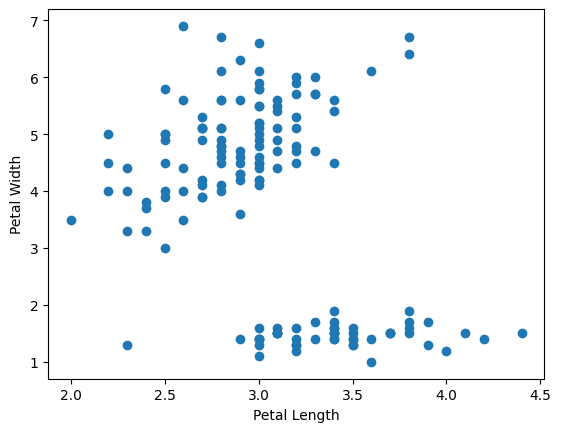

In [26]:
plt.scatter(features[:,2], features[:,3])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()


### D19. Bar chart
Bar chart des moyennes des quatre caractéristiques.


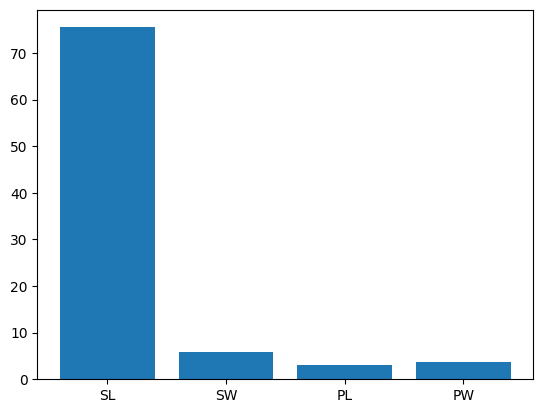

In [27]:
plt.bar(range(4), mean_features)
plt.xticks(range(4), ["SL","SW","PL","PW"])
plt.show()


### D20. Histogram
Histogramme de la largeur des sépales (10 bins).


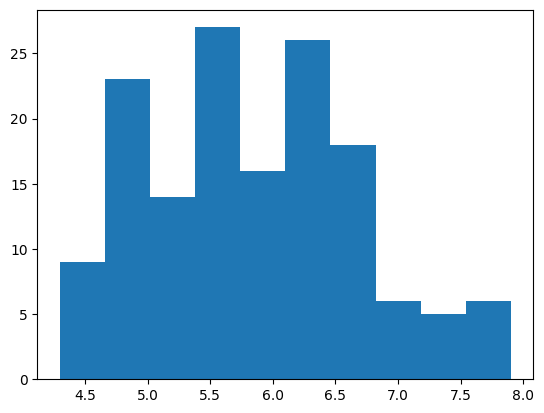

In [28]:
plt.hist(features[:,1], bins=10)
plt.show()



### D21. Boxplot par espèce
Boxplot des longueurs des pétales par espèce.


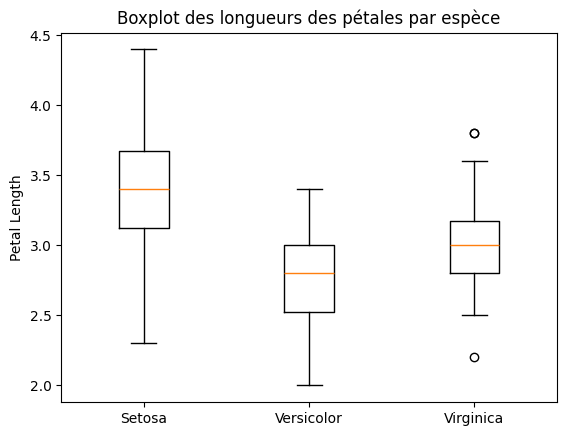

In [30]:
plt.boxplot([
    features[:50,2],   # Setosa
    features[50:100,2],# Versicolor
    features[100:150,2]# Virginica
])
plt.xticks([1, 2, 3], ["Setosa", "Versicolor", "Virginica"])
plt.ylabel("Petal Length")
plt.title("Boxplot des longueurs des pétales par espèce")
plt.show()


# Partie E — Visualisations Avancées

### E22. Subplots comparatifs
Deux scatter plots côte à côte : Setosa vs Versicolor.


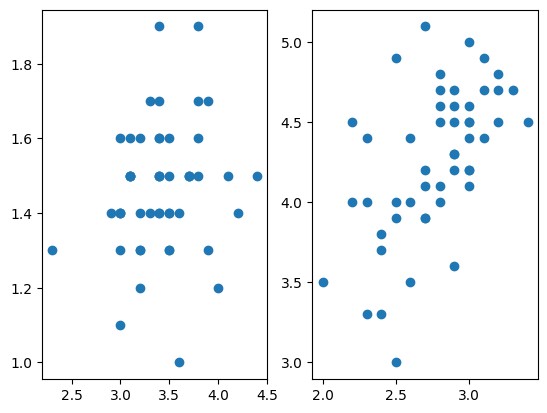

In [31]:
fig, ax = plt.subplots(1,2)
ax[0].scatter(features[:50,2], features[:50,3])
ax[1].scatter(features[50:100,2], features[50:100,3])
plt.show()




### E23. Grille 2x2
Histogrammes des 4 caractéristiques avec `plt.subplots(2,2)`.


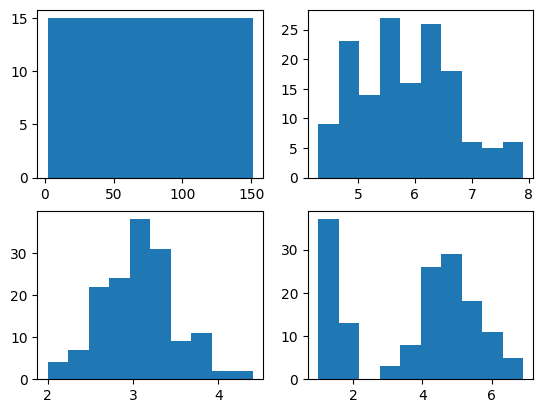

In [32]:
fig, axs = plt.subplots(2,2)
for i, ax in enumerate(axs.flat):
    ax.hist(features[:,i], bins=10)
plt.show()


### E24. Bar chart avec error bars
Moyennes par espèce avec écart-type.


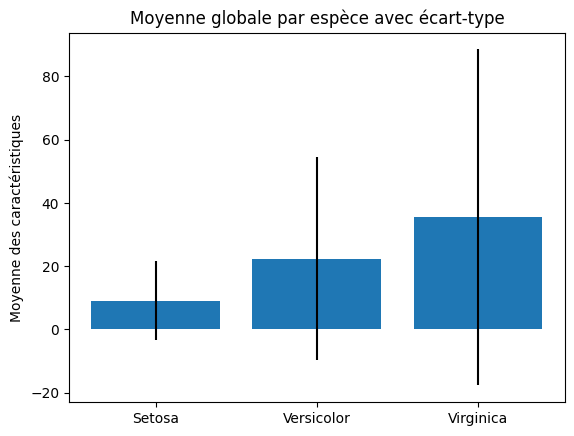

In [34]:
means = []
stds = []
for i in range(3):
    means.append(features_by_species[i].mean())
    stds.append(features_by_species[i].std())

plt.bar(["Setosa", "Versicolor", "Virginica"], means, yerr=stds)
plt.ylabel("Moyenne des caractéristiques")
plt.title("Moyenne globale par espèce avec écart-type")
plt.show()



### E25. Scatter coloré par espèce
Scatter plot avec couleurs par espèce.


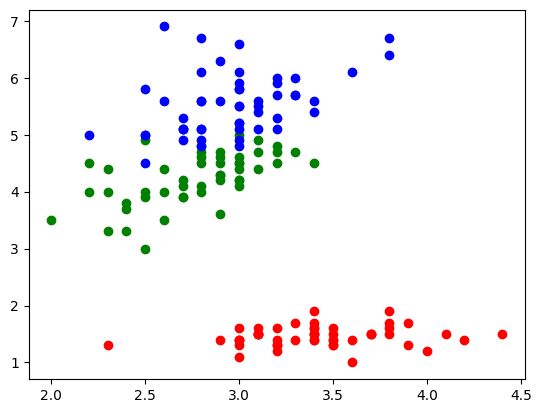

In [35]:
colors = ["red","green","blue"]
for i in range(3):
    plt.scatter(features_by_species[i,:,2],
                features_by_species[i,:,3],
                color=colors[i])
plt.show()



### E26. Line plot superposé
Cumsum des largeurs des pétales par espèce.


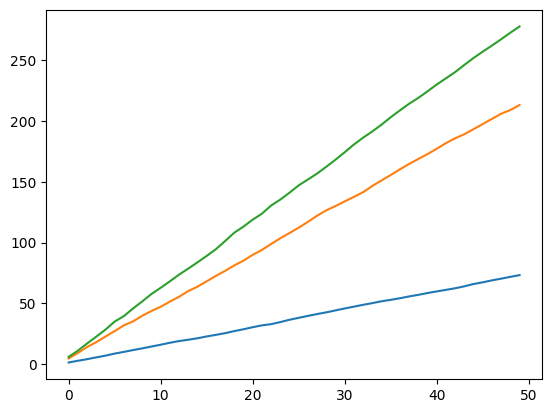

In [36]:
for i in range(3):
    plt.plot(np.cumsum(features_by_species[i,:,3]))
plt.show()




# Partie F — Mini-Analyse Finale

### F27. Corrélations
Calculez la matrice de corrélation avec `np.corrcoef`.


In [37]:
corr_matrix = np.corrcoef(features.T)
corr_matrix



array([[ 1.        ,  0.71667627, -0.39772881,  0.88274732],
       [ 0.71667627,  1.        , -0.10936925,  0.87175416],
       [-0.39772881, -0.10936925,  1.        , -0.4205161 ],
       [ 0.88274732,  0.87175416, -0.4205161 ,  1.        ]])

### F28. Visualisation des corrélations
Visualisez les corrélations sous forme de bar chart ou scatter.


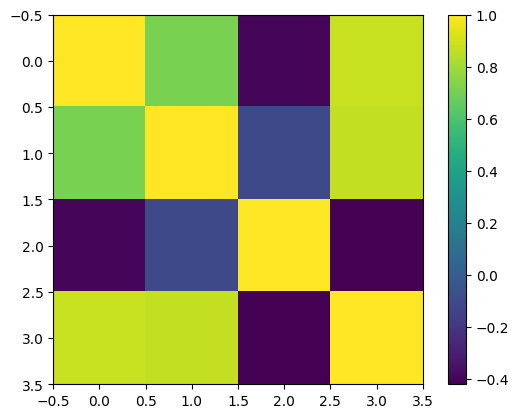

In [38]:
plt.imshow(corr_matrix)
plt.colorbar()
plt.show()



### F29. Variance par espèce
Identifiez l’espèce avec la plus grande variance globale et visualisez ses distributions.


In [39]:
variances = features_by_species.var(axis=(1,2))
variances


array([ 154.664491  , 1030.27232775, 2820.18413775])

### F30. Conclusion
Rédigez une conclusion contenant **3 insights** issus de votre analyse.


1) On voit clairement que la taille des pétales est ce qui distingue le mieux les espèces : Setosa a des pétales beaucoup plus petits que les deux autres.
2) Setosa se démarque facilement, tandis que Versicolor et Virginica se ressemblent un peu, ce qui peut rendre leur séparation un peu plus difficile.
3) Virginica montre le plus de variations dans ses mesures, ce qui veut dire que cette espèce est la plus “diverse” parmi les trois.